<a href="https://colab.research.google.com/github/Ciiku-Kihara/FOOTBALL-RESULT-PREDICTION/blob/main/Football_Results_Prediction_Faith_Kihara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the question

### a) Defining the question
Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly including the ranks of the respective teams.

### b) Defining the metric for success

Build successful logistic and polynomial models with maximum possible accuracy and run heteroskedasticity and multicollinearity tests

### c) Understanding the context

The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Belgium.The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.

### d) Recording the experimental design

- Merge datasets
- Perform cleaning
- Perform Explanatory Data Analysis
- Perform any necessary feature engineering
- Performing multicollinearity tests
- Building logistic and polynomial models
    * Approach 1: Polynomial regression model
    
        * Model 1: Predict how many goals the home team scores
        * Model 2: Predict how many goals the away team scores

    * Approach 2: Logistic regression model
    
         * Figure out from the home team’s perspective if the game is a Win, Loss or Draw (W, L, D)
   
- Cross-validate the model using K fold cross-validation
- Compute Root Mean Squared Error
- Create residual plots for the models
- Assess Heteroscedasticity using Bartlett’s test
- Challenge the solution.


### e) Data Relevance

The data is relevant to answer the gived question

## 2. Importing relevant libraries

In [ ]:
# Loading necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

## 3. Loading and checking the data

In [ ]:
# Loading the rank dataset and previewing the first 5 observations

rank  = pd.read_csv('fifa_ranking.csv')
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
# Loading the results dataset and previewing the first 5 observations

results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
# Checking the shape of the two datasets

print('Rank dataset:', rank.shape)
print(' ')
print('Results dataset:', results.shape)

# The rank dataset has 57793 observations and 16 columns
# The results dataset has 40839 observations and 9 columns

Rank dataset: (57793, 16)
 
Results dataset: (40839, 9)


In [ ]:
# Looking at the columns we have in each dataset

print('Ranking dataset columns:')
print(rank.columns)
print(' ')
print('Results dataset columns:')
print(results.columns)

Ranking dataset columns:
Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')
 
Results dataset columns:
Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')


In [ ]:
# Checking if the columns are of the appropriate data types

print('Ranking dataset column datatypes:')
print(rank.dtypes)
print(' ')
print('Results dataset column datatypes:')
print(results.dtypes)

# The date columns in both the datasets are of the wrong datatype.
# They should not be strings but datetype objects. I will deal with that under data cleaning

Ranking dataset column datatypes:
rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object
 
Results dataset column datatypes:
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


## 4. External data source validation

The datasets are validated using figures found on the FIFA website.

Link: https://www.fifa.com/fifa-world-ranking/

## 5. Merging datasets and Data Cleaning

###a) Merging the datasets

**Assumptions made in merging datasets**

The ranking of teams was done every month as shown in the FIFA website. Hence merging is done on month and year

In [ ]:
# I will drop the unnecessary columns in the rank dataset at first glance

rank.drop(['cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'], axis = 1, inplace=True)

rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,0.0,57,0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,CONMEBOL,1993-08-08


In [ ]:
# Preview of the results dataset

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
# Changing the date columns to date-time

rank['rank_date'] = pd.to_datetime(rank['rank_date'])
results['date'] = pd.to_datetime(results['date'])

# Checking if the columns are of the appropriate data types after the change

print('Ranking dataset column datatypes:')
print(rank.dtypes)
print(' ')
print('Results dataset column datatypes:')
print(results.dtypes)

Ranking dataset column datatypes:
rank                        int64
country_full               object
country_abrv               object
total_points              float64
previous_points             int64
rank_change                 int64
confederation              object
rank_date          datetime64[ns]
dtype: object
 
Results dataset column datatypes:
date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object


In [ ]:
# Creating a new column score_diff for the difference between the home team score and away team score

results['score_diff'] = results['home_score'] - results['away_score']

# Checking if the column has been created

results.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_diff
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1


In [ ]:
# Creating a column to show if the game was a loss or win from the home team's perspective

def home_team(home_goals):
    if home_goals > 0:
        return 'win'
    elif home_goals < 0:
        return 'loss'
    else:
        return 'draw'
      
results['result'] = results.score_diff.apply(lambda x: home_team(x))

# Previewing the dataset

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_diff,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win


In [ ]:
# Looking at the unique values in the tournament column of results

results['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [ ]:
# Getting unique values for the confederation in rank dataset

rank['confederation'].unique()

array(['UEFA', 'CONMEBOL', 'CONCACAF', 'CAF', 'AFC', 'OFC'], dtype=object)

In [ ]:
# Creating a tournament type column with the categories Friendly, World Cup and Other

def tornament(types):
    if types == 'Friendly':
        return 'Friendly'
    elif types == 'FIFA World Cup':
        return 'World cup'
    else:
        return 'Other'
      
results['tournament_type'] = results.tournament.apply(lambda x: tornament(x))

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_diff,result,tournament_type
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,Friendly


In [ ]:
# Creating new year and month columns in both datasets

results['year'] = pd.DatetimeIndex(results['date']).year
results['month'] = pd.DatetimeIndex(results['date']).month



rank['year'] = rank['rank_date'].dt.year
rank['month'] = rank['rank_date'].dt.month

In [ ]:
# Previewing the rank dataset

rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,CONMEBOL,1993-08-08,1993,8


In [ ]:
# Previewing the results dataset

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_diff,result,tournament_type,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,Friendly,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,Friendly,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,Friendly,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,Friendly,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,Friendly,1876,3


In [ ]:
# Creating copies of the rank dataset so that we can get ranks of the home team and away team seperately

rank2 = rank.copy()
rank3 = rank.copy()

In [ ]:
# Converting the country_full column to home team to get the rank of the home team

rank2.rename({'country_full':'home_team', 'rank_date':'date'}, axis = 1, inplace=True)

rank2.head()



,rank,home_team,country_abrv,total_points,previous_points,rank_change,confederation,date,year,month
0,1,Germany,GER,0.0,57,0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,CONMEBOL,1993-08-08,1993,8


In [ ]:
# Merging with the results dataframe on year, month and home team

merge_home = pd.merge(results, rank2, how="left", on = ['home_team', 'year', 'month'])

merge_home.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_diff,result,tournament_type,year,month,rank,country_abrv,total_points,previous_points,rank_change,confederation,date_y
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,Friendly,1872,11,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,Friendly,1873,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,Friendly,1874,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,Friendly,1875,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,Friendly,1876,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
# Looking at the information on the new dataset

merge_home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40908 entries, 0 to 40907
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_x           40908 non-null  datetime64[ns]
 1   home_team        40908 non-null  object        
 2   away_team        40908 non-null  object        
 3   home_score       40908 non-null  int64         
 4   away_score       40908 non-null  int64         
 5   tournament       40908 non-null  object        
 6   city             40908 non-null  object        
 7   country          40908 non-null  object        
 8   neutral          40908 non-null  bool          
 9   score_diff       40908 non-null  int64         
 10  result           40908 non-null  object        
 11  tournament_type  40908 non-null  object        
 12  year             40908 non-null  int64         
 13  month            40908 non-null  int64         
 14  rank             18609 non-null  float

In [ ]:
# Changing the rank to the home rank

merge_home.rename({'rank':'home_rank'}, axis = 1, inplace = True)

merge_home.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_diff,result,tournament_type,year,month,home_rank,country_abrv,total_points,previous_points,rank_change,confederation,date_y
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,Friendly,1872,11,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,Friendly,1873,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,Friendly,1874,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,Friendly,1875,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,Friendly,1876,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
# Now getting the ranks for the away team

rank3.rename({'country_full':'away_team', 'rank_date':'date'}, axis = 1, inplace=True)

rank3.head()

,rank,away_team,country_abrv,total_points,previous_points,rank_change,confederation,date,year,month
0,1,Germany,GER,0.0,57,0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,CONMEBOL,1993-08-08,1993,8


In [ ]:
# Merging with the previous merged dataset to get the final dataset and away team rank based on the year and month of ranking

merge_final = pd.merge(merge_home, rank3, how="left", on = ['away_team', 'year', 'month'])

merge_final.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_diff,result,tournament_type,year,month,home_rank,country_abrv_x,total_points_x,previous_points_x,rank_change_x,confederation_x,date_y,rank,country_abrv_y,total_points_y,previous_points_y,rank_change_y,confederation_y,date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,Friendly,1872,11,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,Friendly,1873,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,Friendly,1874,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,Friendly,1875,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,Friendly,1876,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
# Getting information on the new dataset

merge_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41033 entries, 0 to 41032
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_x             41033 non-null  datetime64[ns]
 1   home_team          41033 non-null  object        
 2   away_team          41033 non-null  object        
 3   home_score         41033 non-null  int64         
 4   away_score         41033 non-null  int64         
 5   tournament         41033 non-null  object        
 6   city               41033 non-null  object        
 7   country            41033 non-null  object        
 8   neutral            41033 non-null  bool          
 9   score_diff         41033 non-null  int64         
 10  result             41033 non-null  object        
 11  tournament_type    41033 non-null  object        
 12  year               41033 non-null  int64         
 13  month              41033 non-null  int64         
 14  home_r

In [ ]:
# Changing the column rank to away_rank

merge_final.rename({'rank' : 'away_rank'}, axis=1, inplace = True)

merge_final.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_diff,result,tournament_type,year,month,home_rank,country_abrv_x,total_points_x,previous_points_x,rank_change_x,confederation_x,date_y,away_rank,country_abrv_y,total_points_y,previous_points_y,rank_change_y,confederation_y,date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,Friendly,1872,11,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,Friendly,1873,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,Friendly,1874,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,Friendly,1875,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,Friendly,1876,3,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT


###b) Data cleaning

In [ ]:
# Checking for null values

merge_final.isnull().sum()

# The values that are missing are missing because of the left merge operation.
# Months and years that were in one dataset may not be available in another which means the
# values in those columns will be null

date_x                   0
home_team                0
away_team                0
home_score               0
away_score               0
tournament               0
city                     0
country                  0
neutral                  0
score_diff               0
result                   0
tournament_type          0
year                     0
month                    0
home_rank            22303
country_abrv_x       22303
total_points_x       22303
previous_points_x    22303
rank_change_x        22303
confederation_x      22303
date_y               22303
away_rank            22393
country_abrv_y       22393
total_points_y       22393
previous_points_y    22393
rank_change_y        22393
confederation_y      22393
date                 22393
dtype: int64

In [ ]:
# Dropping null all rows that have null values since the cannot be replaced with zero or imputed

merge_final.dropna(inplace=True)

In [ ]:
# Checking on the number of non-null observations we are left with

merge_final.info()

# We are left with 16957 non-null observations

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16957 entries, 17910 to 40105
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_x             16957 non-null  datetime64[ns]
 1   home_team          16957 non-null  object        
 2   away_team          16957 non-null  object        
 3   home_score         16957 non-null  int64         
 4   away_score         16957 non-null  int64         
 5   tournament         16957 non-null  object        
 6   city               16957 non-null  object        
 7   country            16957 non-null  object        
 8   neutral            16957 non-null  bool          
 9   score_diff         16957 non-null  int64         
 10  result             16957 non-null  object        
 11  tournament_type    16957 non-null  object        
 12  year               16957 non-null  int64         
 13  month              16957 non-null  int64         
 14  ho

In [ ]:
# Previewing the dataset

merge_final.head(6)

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_diff,result,tournament_type,year,month,home_rank,country_abrv_x,total_points_x,previous_points_x,rank_change_x,confederation_x,date_y,away_rank,country_abrv_y,total_points_y,previous_points_y,rank_change_y,confederation_y,date
17910,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,0,draw,Other,1993,8,19.0,COL,0.0,36.0,16.0,CONMEBOL,1993-08-08,67.0,PAR,0.0,22.0,1.0,CONMEBOL,1993-08-08
17911,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,-1,loss,Other,1993,8,70.0,PER,0.0,16.0,8.0,CONMEBOL,1993-08-08,5.0,ARG,0.0,51.0,5.0,CONMEBOL,1993-08-08
17912,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,0,draw,Other,1993,8,22.0,URU,0.0,47.0,-6.0,CONMEBOL,1993-08-08,35.0,ECU,0.0,23.0,30.0,CONMEBOL,1993-08-08
17913,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,-4,loss,Other,1993,8,94.0,VEN,0.0,4.0,31.0,CONMEBOL,1993-08-08,8.0,BRA,0.0,55.0,-5.0,CONMEBOL,1993-08-08
17914,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,0,draw,Other,1993,8,58.0,SEN,0.0,27.0,-7.0,CAF,1993-08-08,25.0,ZAM,0.0,38.0,7.0,CAF,1993-08-08
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,win,Other,1993,8,59.0,BOL,0.0,13.0,28.0,CONMEBOL,1993-08-08,22.0,URU,0.0,47.0,-6.0,CONMEBOL,1993-08-08


In [ ]:
# Checking on the columns in the final merged dataframe

merge_final.columns

Index(['date_x', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'score_diff', 'result',
       'tournament_type', 'year', 'month', 'home_rank', 'country_abrv_x',
       'total_points_x', 'previous_points_x', 'rank_change_x',
       'confederation_x', 'date_y', 'away_rank', 'country_abrv_y',
       'total_points_y', 'previous_points_y', 'rank_change_y',
       'confederation_y', 'date'],
      dtype='object')

In [ ]:
# Dropping all the unnecessary columns

merge_final.drop(['tournament', 'city', 'country', 'neutral',
                  'country_abrv_x','total_points_x', 'previous_points_x',
                  'rank_change_x','confederation_x', 'date_y',
                  'country_abrv_y','total_points_y', 'previous_points_y', 
                  'rank_change_y','confederation_y', 'date', 'score_diff'], axis = 1, inplace = True)

merge_final.head()

,date_x,home_team,away_team,home_score,away_score,result,tournament_type,year,month,home_rank,away_rank
17910,1993-08-01,Colombia,Paraguay,0,0,draw,Other,1993,8,19.0,67.0
17911,1993-08-01,Peru,Argentina,0,1,loss,Other,1993,8,70.0,5.0
17912,1993-08-01,Uruguay,Ecuador,0,0,draw,Other,1993,8,22.0,35.0
17913,1993-08-01,Venezuela,Brazil,1,5,loss,Other,1993,8,94.0,8.0
17914,1993-08-07,Senegal,Zambia,0,0,draw,Other,1993,8,58.0,25.0


In [ ]:
# Changing the date_x column to date

merge_final.rename({'date_x' : 'date'}, axis = 1, inplace= True)

merge_final.head()


,date,home_team,away_team,home_score,away_score,result,tournament_type,year,month,home_rank,away_rank
17910,1993-08-01,Colombia,Paraguay,0,0,draw,Other,1993,8,19.0,67.0
17911,1993-08-01,Peru,Argentina,0,1,loss,Other,1993,8,70.0,5.0
17912,1993-08-01,Uruguay,Ecuador,0,0,draw,Other,1993,8,22.0,35.0
17913,1993-08-01,Venezuela,Brazil,1,5,loss,Other,1993,8,94.0,8.0
17914,1993-08-07,Senegal,Zambia,0,0,draw,Other,1993,8,58.0,25.0


In [ ]:
# Reseting the index

merge_final.reset_index(inplace=True)

merge_final.head(3)

,index,date,home_team,away_team,home_score,away_score,result,tournament_type,year,month,home_rank,away_rank
0,17910,1993-08-01,Colombia,Paraguay,0,0,draw,Other,1993,8,19.0,67.0
1,17911,1993-08-01,Peru,Argentina,0,1,loss,Other,1993,8,70.0,5.0
2,17912,1993-08-01,Uruguay,Ecuador,0,0,draw,Other,1993,8,22.0,35.0


In [ ]:
# Dropping index column

merge_final.drop('index', axis=1, inplace=True)

merge_final.head()

,date,home_team,away_team,home_score,away_score,result,tournament_type,year,month,home_rank,away_rank
0,1993-08-01,Colombia,Paraguay,0,0,draw,Other,1993,8,19.0,67.0
1,1993-08-01,Peru,Argentina,0,1,loss,Other,1993,8,70.0,5.0
2,1993-08-01,Uruguay,Ecuador,0,0,draw,Other,1993,8,22.0,35.0
3,1993-08-01,Venezuela,Brazil,1,5,loss,Other,1993,8,94.0,8.0
4,1993-08-07,Senegal,Zambia,0,0,draw,Other,1993,8,58.0,25.0


In [ ]:
# Looking if there are any duplicates

merge_final.duplicated().sum()

# There are duplicated 57 duplicated observations

57

In [ ]:
# Dropping the duplicates

merge_final.drop_duplicates(inplace=True)

# Checking if there are any duplicates after cleaning

merge_final.duplicated().sum()

0

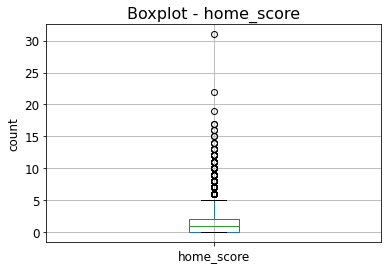

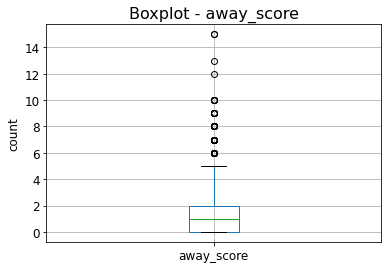

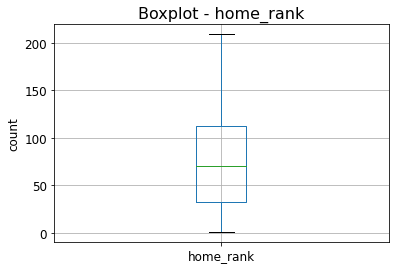

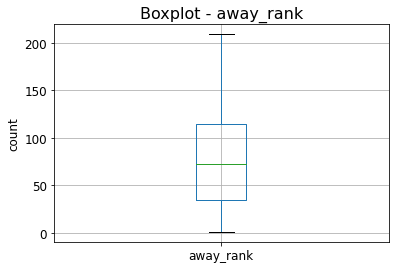

In [ ]:
# Checking for outliers in the dataset

cols = ['home_score','away_score', 'home_rank', 'away_rank']

for column in cols:
    plt.figure()
    merge_final.boxplot([column], fontsize= 12)
    plt.ylabel('count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)

# There are some outliers but they may not have to be removed. Instead I will perform feature scaling later

In [ ]:
merge_final.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score', 'result',
       'tournament_type', 'year', 'month', 'home_rank', 'away_rank'],
      dtype='object')

In [ ]:
# Checking for anomalies in the other columns

qcol = ['result', 'tournament_type', 'year', 'month', 'home_team', 'away_team']

for col in qcol:
  print(col, ':', merge_final[col].unique(), '\n')

result : ['draw' 'loss' 'win'] 

tournament_type : ['Other' 'Friendly' 'World cup'] 

year : [1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018] 

month : [ 8  9 10 11 12  2  3  4  5  6  7  1] 

home_team : ['Colombia' 'Peru' 'Uruguay' 'Venezuela' 'Senegal' 'Bolivia' 'Brazil'
 'Ecuador' 'Guinea' 'Paraguay' 'Faroe Islands' 'Sweden' 'Australia'
 'Congo' 'Argentina' 'Austria' 'Denmark' 'Estonia' 'Albania' 'Bulgaria'
 'England' 'Finland' 'Hungary' 'Iceland' 'Republic of Ireland'
 'Northern Ireland' 'Scotland' 'Spain' 'Morocco' 'Saudi Arabia' 'Zimbabwe'
 'Mexico' 'Norway' 'Romania' 'San Marino' 'Tunisia' 'Zambia' 'Cyprus'
 'Belgium' 'Algeria' 'Cameroon' 'Luxembourg' 'France' 'Germany' 'Italy'
 'Netherlands' 'Poland' 'Portugal' 'Wales' 'Burundi' 'Iraq'
 'Liechtenstein' 'United Arab Emirates' 'Israel' 'Turkey' 'Egypt' 'Gabon'
 'Slovakia' 'Greece' 'Malta' 'Switzerland' 'Gambia' 'Sierra Leone'
 'Guinea-Bissau' 'Mal

## 6. Exploratory Data Analysis

### a) Univariate Analysis

In [ ]:
# Preview of our dataset

merge_final.head(1)

,date,home_team,away_team,home_score,away_score,result,tournament_type,year,month,home_rank,away_rank
0,1993-08-01,Colombia,Paraguay,0,0,draw,Other,1993,8,19.0,67.0


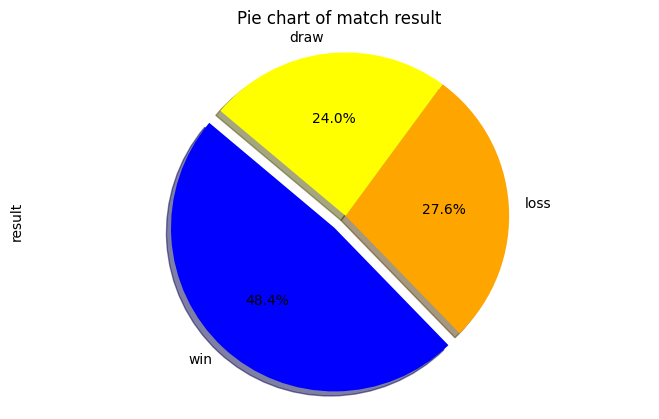

In [ ]:
# Analysis of result of the game from the perspective of the home team

result = merge_final.result.value_counts()
plt.figure(figsize= (8,5), dpi=100)

# Highlighting yes
explode = (0.1, 0, 0)  
colors = ['blue', 'orange', 'yellow']

# Plotting our pie chart
result.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie chart of match result')
plt.show()

# 48.4% of matches resulted in a win for the home teams.

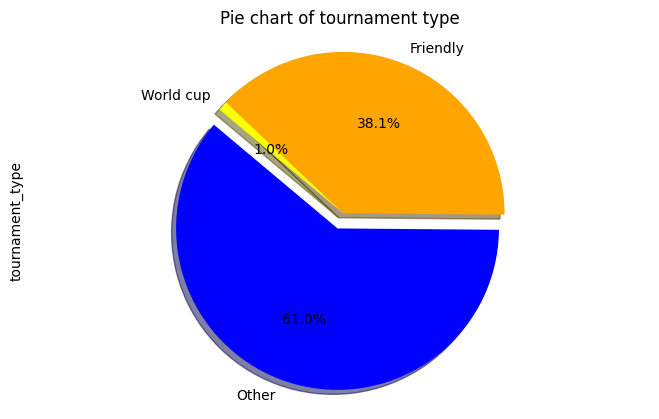

In [ ]:
# Analysis of tournament type

tourn = merge_final.tournament_type.value_counts()
plt.figure(figsize= (8,5), dpi=100)

# Highlighting yes
explode = (0.1, 0, 0)  
colors = ['blue', 'orange', 'yellow']

# Plotting our pie chart
tourn.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie chart of tournament type')
plt.show()

# Only 1% of matches were World Cup matches with 38.1% of matches being friendly matches.
# 61% of matches played were neither World Cup matches or friendly matches

In [ ]:
# Analysis of away teams

merge_final['away_team'].nunique()

# 193 different teams played away from home

193

In [ ]:
# Analysis of home teams

merge_final['home_team'].nunique()

# 193 different teams played at home.
# It is a fair assumption that 193 teams participated in the tournament

193

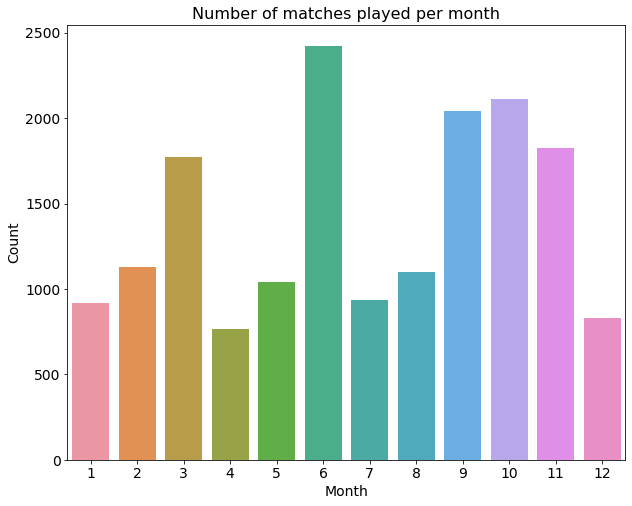

In [ ]:
# Analysis of how many matches were played per month

plt.figure(figsize = (10,8))
sns.countplot(x= merge_final['month'])
plt.title('Number of matches played per month', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

# Most of the matches were played in June with le least number being played in April

In [ ]:
# Determining the range of years in which matches were played in the dataset

range = merge_final['year'].max() - merge_final['year'].min()

print('Earliest year:', merge_final['year'].min())
print(' ')
print('Latest year:', merge_final['year'].max())
print(' ')
print('Range of years:', range)

# The matches were recorded over a period of 25 years

Earliest year: 1993
 
Latest year: 2018
 
Range of years: 25


In [ ]:
# Getting the description on home score

merge_final.home_score.describe()

# The lowest home score was zero with the highest being 31. 75% of the home
# goals were below 2 goals.

count    16900.000000
mean         1.604024
std          1.615581
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         31.000000
Name: home_score, dtype: float64

In [ ]:
# Measures of dispersion

print('The skewness is:', merge_final['home_score'].skew())
print('The kurtosis is:', merge_final['home_score'].kurt())
print('The coefficient of variation is:', merge_final['home_score'].std()/merge_final['home_score'].mean())

# The home score is skewed to the right indicating more outliers on the positive side of the scale
# The didtribution is highly leptokurtic further indicating a presence of outliers

The skewness is: 2.325029588711364
The kurtosis is: 15.251926441824807
The coefficient of variation is: 1.007205363658767


In [ ]:
# Getting a description of the away score

merge_final.away_score.describe()

# The lowest home score was zero with the highest being 15. 75% of the home
# goals were below 2.

count    16900.000000
mean         1.068402
std          1.245215
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: away_score, dtype: float64

In [ ]:
# Measures of dispersion

print('The skewness is:', merge_final['away_score'].skew())
print('The kurtosis is:', merge_final['away_score'].kurt())
print('The coefficient of variation is:', merge_final['away_score'].std()/merge_final['away_score'].mean())

# The distribution of the away score is slightly skewed to the right and is also leptokurtic indicating
# a presence of outliers

The skewness is: 1.928787200959817
The kurtosis is: 7.1668180093594716
The coefficient of variation is: 1.1654927005837932


In [ ]:
# Description on the rankings

print(merge_final['home_rank'].describe())
print(' ')
print(merge_final['away_rank'].describe())

# The lowest rank is 209

count    16900.000000
mean        76.057219
std         50.839283
min          1.000000
25%         33.000000
50%         70.000000
75%        112.000000
max        209.000000
Name: home_rank, dtype: float64
 
count    16900.000000
mean        78.927988
std         52.030358
min          1.000000
25%         35.000000
50%         72.000000
75%        115.000000
max        209.000000
Name: away_rank, dtype: float64


### b) Bivariate Analysis

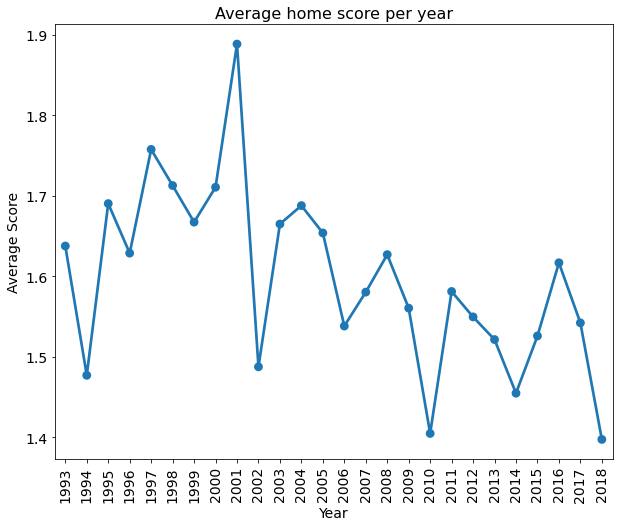

In [ ]:
# Line graph of average home goals per year

home = merge_final.groupby('year')['home_score'].mean()

home = pd.DataFrame(home)
home.reset_index(inplace= True)

plt.figure(figsize = (10,8))
sns.pointplot(x= home['year'], y = home['home_score'])
plt.title('Average home score per year', fontsize = 16)
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Average Score', fontsize = 14)
plt.show()

# The highest average home score was in 2001 with an average of 1.9 goals in that year

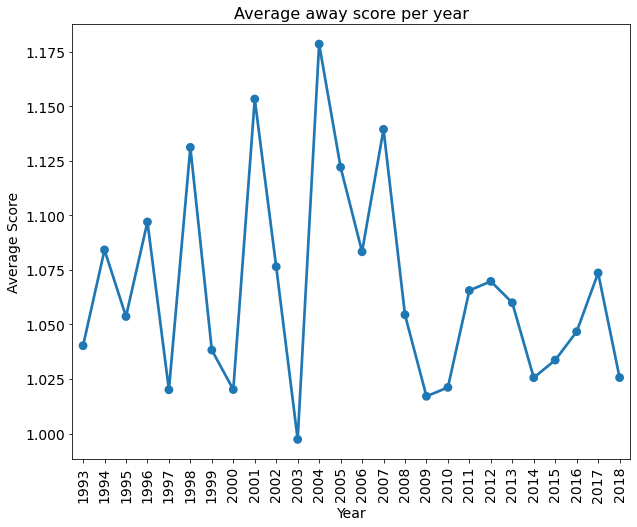

In [ ]:
# Line graph of average away goals per year

away = merge_final.groupby('year')['away_score'].mean()

away = pd.DataFrame(away)
away.reset_index(inplace= True)

plt.figure(figsize = (10,8))
sns.pointplot(x= away['year'], y = away['away_score'])
plt.title('Average away score per year', fontsize = 16)
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Average Score', fontsize = 14)
plt.show()

# The highest average away score was in 2004 with an average of around 1.175 goals in that year

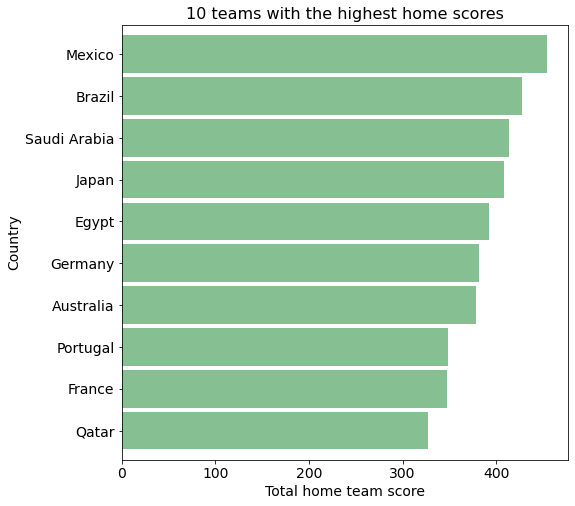

In [ ]:
# Horizontal bar graph of top total home score per group

hscore = merge_final.groupby('home_team')['home_score'].sum().sort_values().tail(10)

hscore.plot(kind='barh',figsize=(8,8), color='#86bf91', width = 0.9)
plt.title('10 teams with the highest home scores', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Total home team score', fontsize = 14)
plt.ylabel('Country', fontsize = 14)
plt.show()

# Mexico scored the highest number of goals at home with Brazil following closely behind

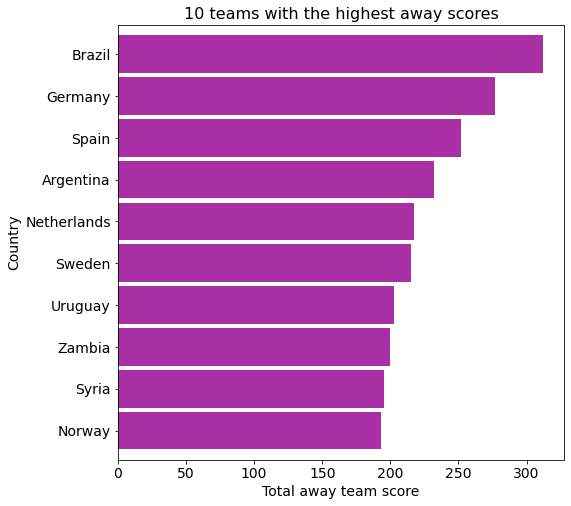

In [ ]:
# Horizontal bar graph of top total home score per group

ascore = merge_final.groupby('away_team')['away_score'].sum().sort_values().tail(10)

ascore.plot(kind='barh',figsize=(8,8), color='#a82fa4', width = 0.9)
plt.title('10 teams with the highest away scores', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Total away team score', fontsize = 14)
plt.ylabel('Country', fontsize = 14)
plt.show()

# Brazil scored the highest number of goals away from home followed by Germany.

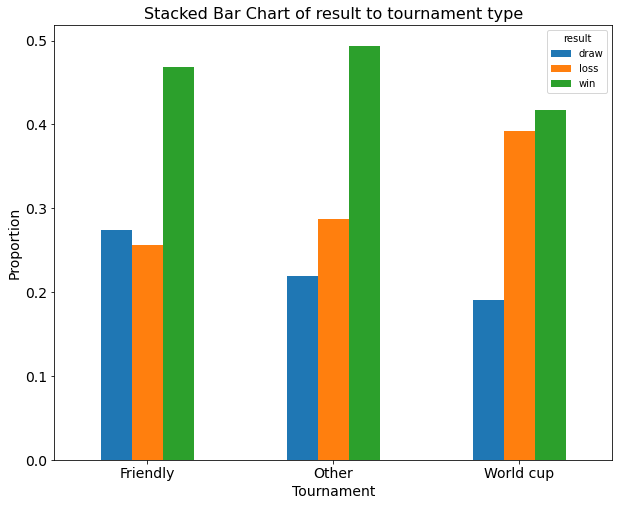

In [ ]:
# Comparison of the result and tournament type 

table=pd.crosstab(merge_final['tournament_type'],merge_final['result'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of result to tournament type', fontsize = 16)
plt.xlabel('Tournament', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# Irrespective of the tournament type, there were more wins for the home team than draws or losses

In [ ]:
# Checking if there is any correlation between the ranking of the home team and away team

merge_final['away_rank'].corr(merge_final['home_rank'])

0.46946969522667903

## 7. Performing feature scaling

The data will be normalized because the ranges of values in the columns differ greatly from each other. The distributions in some of the columns also do not follow a gaussian distribution



In [ ]:
# Dropping the date column

merge_final.drop('date', axis = 1, inplace=True)

merge_final.head()

,home_team,away_team,home_score,away_score,result,tournament_type,year,month,home_rank,away_rank
0,Colombia,Paraguay,0,0,draw,Other,1993,8,19.0,67.0
1,Peru,Argentina,0,1,loss,Other,1993,8,70.0,5.0
2,Uruguay,Ecuador,0,0,draw,Other,1993,8,22.0,35.0
3,Venezuela,Brazil,1,5,loss,Other,1993,8,94.0,8.0
4,Senegal,Zambia,0,0,draw,Other,1993,8,58.0,25.0


In [ ]:
# Getting a description of the dataset

merge_final.describe()

,home_score,away_score,year,month,home_rank,away_rank
count,16900.000000,16900.000000,16900.000000,16900.000000,16900.000000,16900.000000
mean,1.604024,1.068402,2006.489941,6.878225,76.057219,78.927988
std,1.615581,1.245215,6.804052,3.273726,50.839283,52.030358
min,0.000000,0.000000,1993.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,2001.000000,4.000000,33.000000,35.000000
50%,1.000000,1.000000,2007.000000,7.000000,70.000000,72.000000
75%,2.000000,2.000000,2012.000000,10.000000,112.000000,115.000000
max,31.000000,15.000000,2018.000000,12.000000,209.000000,209.000000


In [ ]:
merge_final.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'result',
       'tournament_type', 'year', 'month', 'home_rank', 'away_rank'],
      dtype='object')

In [ ]:
# Normalizing the data

scaled = merge_final[['home_score', 'away_score', 'year', 'month', 'home_rank', 'away_rank' ]]

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

names = scaled.columns
d = scaler.fit_transform(scaled)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,home_score,away_score,year,month,home_rank,away_rank
0,0.000000,0.000000,0.0,0.636364,0.086538,0.317308
1,0.000000,0.066667,0.0,0.636364,0.331731,0.019231
2,0.000000,0.000000,0.0,0.636364,0.100962,0.163462
3,0.032258,0.333333,0.0,0.636364,0.447115,0.033654
4,0.000000,0.000000,0.0,0.636364,0.274038,0.115385


In [ ]:
# Concatenating the dataframes

df = merge_final[['home_team', 'away_team', 'result','tournament_type']]

scaled_df = pd.concat([df, scaled_df], axis=1)

scaled_df.head()

# All values are standardized

,home_team,away_team,result,tournament_type,home_score,away_score,year,month,home_rank,away_rank
0,Colombia,Paraguay,draw,Other,0.000000,0.000000,0.0,0.636364,0.086538,0.317308
1,Peru,Argentina,loss,Other,0.000000,0.066667,0.0,0.636364,0.331731,0.019231
2,Uruguay,Ecuador,draw,Other,0.000000,0.000000,0.0,0.636364,0.100962,0.163462
3,Venezuela,Brazil,loss,Other,0.032258,0.333333,0.0,0.636364,0.447115,0.033654
4,Senegal,Zambia,draw,Other,0.000000,0.000000,0.0,0.636364,0.274038,0.115385


In [ ]:
# Information on the scaled dataframe

scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16957 entries, 0 to 16956
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   home_team        16900 non-null  object 
 1   away_team        16900 non-null  object 
 2   result           16900 non-null  object 
 3   tournament_type  16900 non-null  object 
 4   home_score       16900 non-null  float64
 5   away_score       16900 non-null  float64
 6   year             16900 non-null  float64
 7   month            16900 non-null  float64
 8   home_rank        16900 non-null  float64
 9   away_rank        16900 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [ ]:
# Dropping the null values

scaled_df.dropna(inplace=True)

scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16843 entries, 0 to 16899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   home_team        16843 non-null  object 
 1   away_team        16843 non-null  object 
 2   result           16843 non-null  object 
 3   tournament_type  16843 non-null  object 
 4   home_score       16843 non-null  float64
 5   away_score       16843 non-null  float64
 6   year             16843 non-null  float64
 7   month            16843 non-null  float64
 8   home_rank        16843 non-null  float64
 9   away_rank        16843 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


## 8. Implementing the solution

##a) Polynomial Approach

In [ ]:
# Previewing the columns

scaled_df.columns

Index(['home_team', 'away_team', 'result', 'tournament_type', 'home_score',
       'away_score', 'year', 'month', 'home_rank', 'away_rank'],
      dtype='object')

In [ ]:
# Encoding the result and tournament type columns

poly = scaled_df[['result', 'tournament_type', 'home_score',
       'away_score', 'year', 'month', 'home_rank', 'away_rank']]

poly = pd.get_dummies(poly, drop_first=True)

poly.head()

,home_score,away_score,year,month,home_rank,away_rank,result_loss,result_win,tournament_type_Other,tournament_type_World cup
0,0.000000,0.000000,0.0,0.636364,0.086538,0.317308,0,0,1,0
1,0.000000,0.066667,0.0,0.636364,0.331731,0.019231,1,0,1,0
2,0.000000,0.000000,0.0,0.636364,0.100962,0.163462,0,0,1,0
3,0.032258,0.333333,0.0,0.636364,0.447115,0.033654,1,0,1,0
4,0.000000,0.000000,0.0,0.636364,0.274038,0.115385,0,0,1,0


In [ ]:
# Finding multicollinearity in independent variables in X

X = poly[['home_rank', 'away_rank','tournament_type_Other', 'tournament_type_World cup' ]]

correlations = X.corr()
correlations

,home_rank,away_rank,tournament_type_Other,tournament_type_World cup
home_rank,1.000000,0.469029,0.068057,-0.045465
away_rank,0.469029,1.000000,0.076712,-0.032270
tournament_type_Other,0.068057,0.076712,1.000000,-0.105889
tournament_type_World cup,-0.045465,-0.032270,-0.105889,1.000000


In [ ]:
# Getting the Variance Inflation Factor

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)

# The VIF score for each variable is found on the diagonal. All VIF scores are less than 4 which shows
# there is no multicollinearity

,home_rank,away_rank,tournament_type_Other,tournament_type_World cup
home_rank,1.284951,-0.598646,-0.037809,0.035098
away_rank,-0.598646,1.285420,-0.056995,0.008228
tournament_type_Other,-0.037809,-0.056995,1.017983,0.104235
tournament_type_World cup,0.035098,0.008228,0.104235,1.012899


Since we are dealing with multiple features, I will compare the accuracy between the model built using linear regression and the one built using polynomial regression. If the accuracy of the model increases after  using the polynomial approach, then it indicates that it is probably the most appropriate approach to take.

## Model 1

In [ ]:
# Defining y 

y = poly['home_score']

In [ ]:
# Fitting a linear Regression to the dataset to check its accuracy

poly_reg_1 = PolynomialFeatures(degree = 1) 
X_poly = poly_reg_1.fit_transform(X)

# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=0)

# Fitting the model

pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

# Using the model to make a prediction

y_pred = pol_reg.predict(X_test)

# Checking accuracy of the model

print(pol_reg.score(X_test, y_test))


0.2173957974304711


In [ ]:
# Comparing the test results to the train results

comparison_frame = pd.DataFrame({'Actual': y_test.values.flatten(), 
                                 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,3369.000000,3369.000000
mean,0.050604,0.051586
std,0.049261,0.023796
min,0.000000,-0.032187
25%,0.000000,0.036351
50%,0.032258,0.050736
75%,0.064516,0.066517
max,0.419355,0.140393


In [ ]:
# Obtaining the root mean squared error

print('Root MSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# The root MSE is greater than 10% of the actual mean value. 
# 10% of the actual mean value is 0.005. Therefore this model cannot predict the data accurately

Root MSE:  0.04357263330001562


With a linear regression model the accuracy is very low at 21.7%. Checking if the accuracy will improve with a polynomial model

In [ ]:
# Fitting a polynomial regression of degree 2 to the dataset to check its accuracy

poly_reg_2 = PolynomialFeatures(degree = 2) 
X_poly = poly_reg_2.fit_transform(X)

# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=0)

# Fitting the model

pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

# Using the model to make a prediction

y_pred = pol_reg.predict(X_test)

# Checking accuracy of the model

print(pol_reg.score(X_test, y_test))

0.23320058266891075


The accuracy of the model changes to 23.32% after fitting the polynomial model to degree 2.


Checking with the 4th degree polynomial model

In [ ]:
# Fitting a polynomial regression of degree 4 to the dataset to check its accuracy

poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(X)

# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=0)

# Fitting the model

pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

# Using the model to make a prediction

y_pred = pol_reg.predict(X_test)

# Checking accuracy of the model

print(pol_reg.score(X_test, y_test))

0.24194118403958276


In [ ]:
# Comparing the test results to the train results

comparison_frame = pd.DataFrame({'Actual': y_test.values.flatten(), 
                                 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,3369.000000,3369.000000
mean,0.050604,0.051432
std,0.049261,0.025276
min,0.000000,-0.005647
25%,0.000000,0.035041
50%,0.032258,0.046355
75%,0.064516,0.061936
max,0.419355,0.199297


In [ ]:
# Obtaining the root mean squared error

print('Root MSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# The root MSE is greater than 10% of the actual mean value. 
# 10% of the actual mean value is 0.005. Therefore this model cannot predict the data accurately

Root MSE:  0.04288388974204982


Using the polynomial at 4 degrees gave the highest accuracy at 24.19%. After the 4th degree the accuracy starts to decrease which means that the 4th degree may be the most optimal in this case.

However, fitting this high degree polynomial could lead to overfitting

### Using K-Fold cross validation

In [ ]:
# Getting the model accuracy after using 4 fold cross validation using the cross-val-score method

all_accuracies = cross_val_score(estimator=pol_reg, X=X_poly, y=y, cv=4)

all_accuracies

array([ 0.23523286,  0.2718855 ,  0.23011416, -0.18710159])

In [ ]:
# Printing the mean accuracy returned for the 4 folds 

print(all_accuracies.mean())


0.13753273427908086


The accuracy level does not increase using the 3 fold cross validation

### Checking for presence of heteroskedasticity using residual plots

In [ ]:
# Obtaining the residuals for each observation

residuals = np.subtract(y_pred, y_test)

residuals

12450   -0.018749
12839    0.003418
7603     0.039069
11919   -0.013924
6381     0.013361
           ...   
3539     0.028543
4501     0.033121
14756    0.002332
2696     0.036436
15194   -0.029804
Name: home_score, Length: 3369, dtype: float64

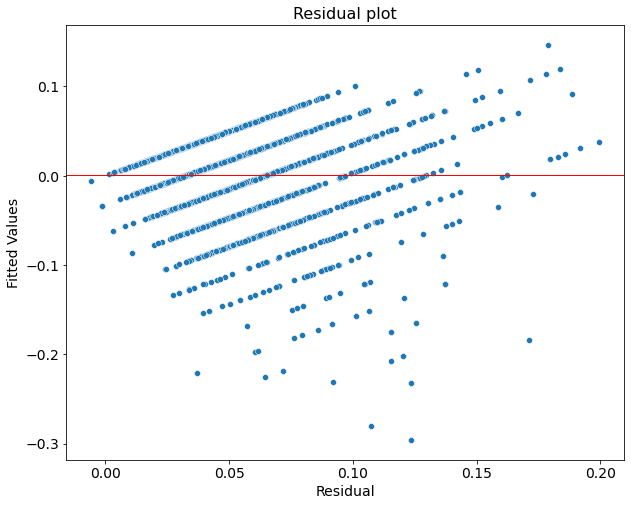

In [ ]:
# Plotting the residual plot

plt.figure(figsize = (10,8))
sns.scatterplot(x = y_pred, y = residuals)
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residual plot', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Residual', fontsize = 14)
plt.ylabel('Fitted Values', fontsize = 14)
plt.show()

From the plot we can see that the homoscedasticity assumption is not violated. The variances are uniform and not taking an increasing or decreasing trend.

Bartlett's test can be used to confirm these results

### Checking for presence of heteroskedasticity using Bartlett's test

> Ho: Variances are homogenous

> Ha: Variances are heterogenous

In [ ]:
# Performing the test

import scipy as sc

stat, p_value = sc.stats.bartlett(y_pred, residuals)

# Obtaining the critical value

dof = len(y_pred) - 1
prob = 1 - p_value

critical_value = sc.stats.chi2.ppf(prob, dof)

print('Statistic:', stat)
print('Critical value', critical_value)

if stat > critical_value:
  print('Reject null hypothesis')
else:
  print('Do not reject null hypothesis')


Statistic: 900.1573613743523
Critical value inf
Do not reject null hypothesis


Since the chi square statistic is less than the critical value, we will fail to reject null and conclude that the error variances are homogenous.

Therefore there is no heteroskedasticity in our model

## Model 2

In [ ]:
# Defining y 

y = poly['away_score']

In [ ]:
# Fitting a linear Regression to the dataset to check its accuracy

poly_reg_1 = PolynomialFeatures(degree = 1) 
X_poly = poly_reg_1.fit_transform(X)

# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=0)

# Fitting the model

pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

# Using the model to make a prediction

y_pred = pol_reg.predict(X_test)

# Checking accuracy of the model

print(pol_reg.score(X_test, y_test))


0.159016631554885


In [ ]:
# Comparing the test results to the train results

comparison_frame = pd.DataFrame({'Actual': y_test.values.flatten(), 
                                 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,3369.000000,3369.000000
mean,0.072445,0.071435
std,0.083097,0.032319
min,0.000000,-0.051217
25%,0.000000,0.051590
50%,0.066667,0.070304
75%,0.133333,0.090782
max,0.666667,0.198317


In [ ]:
# Obtaining the root mean squared error

print('Root MSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# The root MSE is greater than 10% of the actual mean value. 
# 10% of the actual mean value is 0.0077. Therefore this model cannot predict the data accurately

Root MSE:  0.07619290088182483


With a linear regression model the accuracy is extremely low at 15.9%. Checking if the accuracy will improve with a polynomial model

In [ ]:
# Fitting a polynomial regression of degree 2 to the dataset to check its accuracy

poly_reg_2 = PolynomialFeatures(degree = 2) 
X_poly = poly_reg_2.fit_transform(X)

# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=0)

# Fitting the model

pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

# Using the model to make a prediction

y_pred = pol_reg.predict(X_test)

# Checking accuracy of the model

print(pol_reg.score(X_test, y_test))

0.17149000567433648


The accuracy of the model changes to 17.14% after fitting the polynomial model to degree 2.


Checking with the 5th degree polynomial model

In [ ]:
# Fitting a polynomial regression of degree 5 to the dataset to check its accuracy

poly_reg_5 = PolynomialFeatures(degree = 5) 
X_poly = poly_reg_5.fit_transform(X)

# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=0)

# Fitting the model

pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

# Using the model to make a prediction

y_pred = pol_reg.predict(X_test)

# Checking accuracy of the model

print(pol_reg.score(X_test, y_test))

0.18320550634324761


Using the polynomial at 5 degrees gave the highest accuracy at 18.32%. After the 5th degree the accuracy starts to decrease which means that the 5th degree may be the most optimal in this case.

It is possible however that there is overfitting in this case.

### Using K Fold cross validation

In [ ]:
# Getting the model accuracy after using 3 fold cross validation using the cross-val-score method

all_accuracies = cross_val_score(estimator=pol_reg, X=X_poly, y=y, cv=3)

all_accuracies

array([  0.15786895,   0.19565581, -59.92695463])

In [ ]:
# Printing the mean accuracy returned for the 3 folds 

print(all_accuracies.mean())


-19.85780995869197


Accuracy does not improve using 3 fold cross validation

### Checking for presence of heteroskedasticity using residual plots

In [ ]:
# Obtaining the residuals for each observation

residuals = np.subtract(y_pred, y_test)

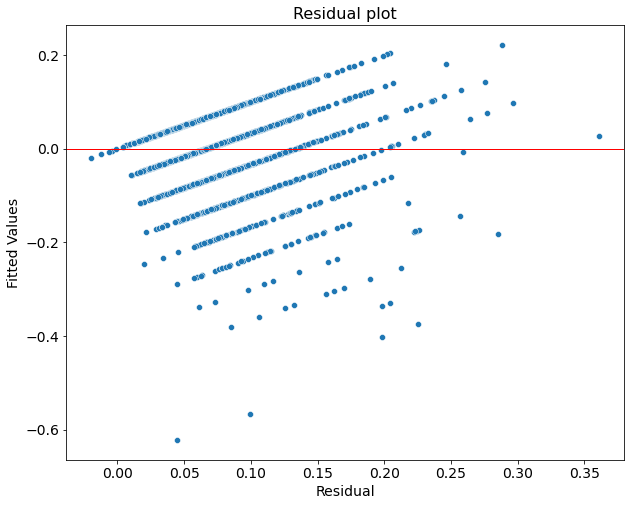

In [ ]:
# Plotting the residual plot

plt.figure(figsize = (10,8))
sns.scatterplot(x = y_pred, y = residuals)
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residual plot', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Residual', fontsize = 14)
plt.ylabel('Fitted Values', fontsize = 14)
plt.show()

From the plot we can see that the homoscedasticity assumption is not violated. The variances are uniform and not taking an increasing or decreasing trend.

Bartlett's test can be used to confirm these results

### Checking for presence of heteroskedasticity using Bartlett's test

> Ho: Variances are homogenous

> Ha: Variances are heterogenous

In [ ]:
# Performing the test

import scipy as sc

stat, p_value = sc.stats.bartlett(y_pred, residuals)

# Obtaining the critical value

dof = len(y_pred) - 1
prob = 1 - p_value

critical_value = sc.stats.chi2.ppf(prob, dof)

print('Statistic:', stat)
print('Critical value', critical_value)

if stat > critical_value:
  print('Reject null hypothesis')
else:
  print('Do not reject null hypothesis')


Statistic: 1555.5978937660634
Critical value inf
Do not reject null hypothesis


Since the chi square statistic is less than the critical value, we will fail to reject null and conclude that the error variances are homogenous.

Therefore there is no heteroskedasticity in our model

##b) Logistic Approach

In [ ]:
# Creating the logistic dataframe

logistic = scaled_df[['result', 'tournament_type', 'home_score',
       'away_score', 'year', 'month', 'home_rank', 'away_rank']]

logistic.head()

,result,tournament_type,home_score,away_score,year,month,home_rank,away_rank
0,draw,Other,0.000000,0.000000,0.0,0.636364,0.086538,0.317308
1,loss,Other,0.000000,0.066667,0.0,0.636364,0.331731,0.019231
2,draw,Other,0.000000,0.000000,0.0,0.636364,0.100962,0.163462
3,loss,Other,0.032258,0.333333,0.0,0.636364,0.447115,0.033654
4,draw,Other,0.000000,0.000000,0.0,0.636364,0.274038,0.115385


In [ ]:
logistic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16843 entries, 0 to 16899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   result           16843 non-null  object 
 1   tournament_type  16843 non-null  object 
 2   home_score       16843 non-null  float64
 3   away_score       16843 non-null  float64
 4   year             16843 non-null  float64
 5   month            16843 non-null  float64
 6   home_rank        16843 non-null  float64
 7   away_rank        16843 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.2+ MB


In [ ]:
# Encoding the target variable

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
logistic['result_cat'] = labelencoder.fit_transform(logistic['result'])
logistic.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,result,tournament_type,home_score,away_score,year,month,home_rank,away_rank,result_cat
0,draw,Other,0.000000,0.000000,0.0,0.636364,0.086538,0.317308,0
1,loss,Other,0.000000,0.066667,0.0,0.636364,0.331731,0.019231,1
2,draw,Other,0.000000,0.000000,0.0,0.636364,0.100962,0.163462,0
3,loss,Other,0.032258,0.333333,0.0,0.636364,0.447115,0.033654,1
4,draw,Other,0.000000,0.000000,0.0,0.636364,0.274038,0.115385,0


In [ ]:
# Defining X and y

X = logistic.drop(['result', 'result_cat'], axis = 1)
y = logistic['result_cat']

In [ ]:
# One hot encoding X 

X = pd.get_dummies(X, drop_first=True)
X.head()

,home_score,away_score,year,month,home_rank,away_rank,tournament_type_Other,tournament_type_World cup
0,0.000000,0.000000,0.0,0.636364,0.086538,0.317308,1,0
1,0.000000,0.066667,0.0,0.636364,0.331731,0.019231,1,0
2,0.000000,0.000000,0.0,0.636364,0.100962,0.163462,1,0
3,0.032258,0.333333,0.0,0.636364,0.447115,0.033654,1,0
4,0.000000,0.000000,0.0,0.636364,0.274038,0.115385,1,0


In [ ]:
# Finding multicollinearity in independent variables in X

correlations = X.corr()
correlations

,home_score,away_score,year,month,home_rank,away_rank,tournament_type_Other,tournament_type_World cup
home_score,1.000000,-0.163713,-0.038139,0.017371,-0.135751,0.318620,0.055678,-0.005289
away_score,-0.163713,1.000000,-0.007723,0.018547,0.221984,-0.180107,0.028291,-0.010329
year,-0.038139,-0.007723,1.000000,-0.000081,0.105117,0.106599,-0.023116,-0.023337
month,0.017371,0.018547,-0.000081,1.000000,0.028664,0.028638,0.126775,0.006876
home_rank,-0.135751,0.221984,0.105117,0.028664,1.000000,0.469029,0.068057,-0.045465
away_rank,0.318620,-0.180107,0.106599,0.028638,0.469029,1.000000,0.076712,-0.032270
tournament_type_Other,0.055678,0.028291,-0.023116,0.126775,0.068057,0.076712,1.000000,-0.105889
tournament_type_World cup,-0.005289,-0.010329,-0.023337,0.006876,-0.045465,-0.032270,-0.105889,1.000000


In [ ]:
# Getting the Variance Inflation Factor

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)

# The VIF score for each variable is found on the diagonal. All VIF scores are less than 4 which shows
# there is no multicollinearity

,home_score,away_score,year,month,home_rank,away_rank,tournament_type_Other,tournament_type_World cup
home_score,1.266373,-0.005761,0.065042,-0.010881,0.463130,-0.624362,-0.050686,0.003773
away_score,-0.005761,1.182073,0.010783,-0.016866,-0.465562,0.434966,-0.032204,0.002007
year,0.065042,0.010783,1.020582,-0.001167,-0.053083,-0.104523,0.033781,0.022071
month,-0.010881,-0.016866,-0.001167,1.017677,-0.012713,-0.013486,-0.128375,-0.021863
home_rank,0.463130,-0.465562,-0.053083,-0.012713,1.641439,-0.990764,-0.044289,0.034456
away_rank,-0.624362,0.434966,-0.104523,-0.013486,-0.990764,1.757138,-0.045008,0.005736
tournament_type_Other,-0.050686,-0.032204,0.033781,-0.128375,-0.044289,-0.045008,1.038648,0.107586
tournament_type_World cup,0.003773,0.002007,0.022071,-0.021863,0.034456,0.005736,0.107586,1.013850


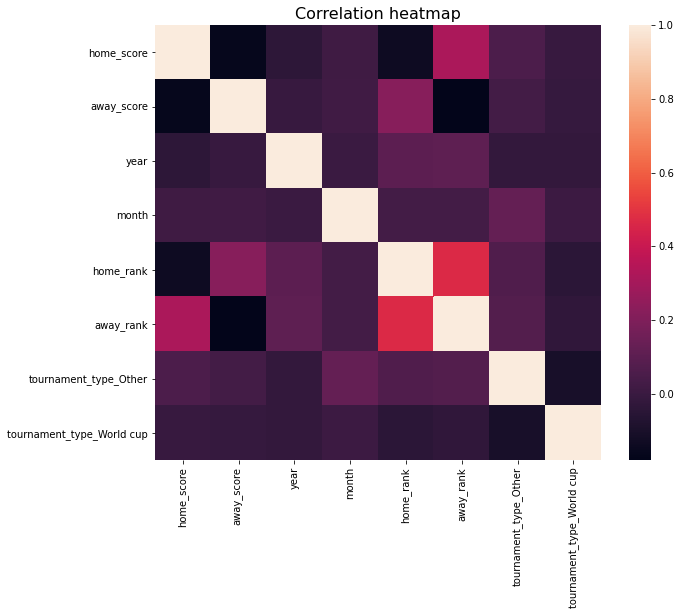

In [ ]:
# Using the heatmap to check for independence between features

plt.figure(figsize = (10,8))
sns.heatmap(X.corr())
plt.title('Correlation heatmap', fontsize = 16)
plt.show()

In [ ]:
#  Checking that my dataset size is sufficient

records = X.shape[0]
features = X.shape[1]

records/features

# The ratio of features to records is 1:2105 which is a sufficient dataset size to build the model

2105.375

In [ ]:
# Splitting into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

In [ ]:
# Fitting our model

LogReg = LogisticRegression()

LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Obtaining the coefficients and intercept

print('Intercept:', LogReg.intercept_)
print('Coefficients:', LogReg.coef_)

Intercept: [ 0.2519956  -0.47708105  0.22508545]
Coefficients: [[-3.86243064e+00 -1.70380794e+00 -7.72813953e-05  3.29431251e-02
   5.17511294e-02 -1.70287563e-01 -1.66580975e-01 -2.62554257e-01]
 [-7.73156251e+00  6.56274819e+00  7.47191092e-02 -4.92667214e-03
   2.82531601e-01 -1.82091607e-01  1.33982252e-01  3.54176155e-01]
 [ 1.15939931e+01 -4.85894025e+00 -7.46418278e-02 -2.80164530e-02
  -3.34282731e-01  3.52379170e-01  3.25987230e-02 -9.16218982e-02]]


In [ ]:
# Using the model to make a prediction

y_pred = LogReg.predict(X_test)

In [ ]:
# Getting the accuracy of our model

from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.6310477886613238

The model can correctly predict if home team won, lost or drew in a match with an accuracy of 63.1% given the features used in the dataset

### Using K fold cross validation

In [ ]:
# Getting the model accuracy after using 10 fold cross validation using the cross-val-score method

all_accuracies = cross_val_score(estimator=LogReg, X=X, y=y, cv=10)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# Printing the mean accuracy returned for the ten folds 

print(all_accuracies.mean())

# Using the 10 Fold Cross validation method, the accuracy did not increase

0.62623060820288


### Hyper-parameter tuning using grid search

In [ ]:
# Creating regularization penalty space

grid_param = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(0, 4, 10),
    'dual' : [True, False]}

In [ ]:
# Instantiating GridSearchCV object

gd_sr = GridSearchCV(estimator=LogReg,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

In [ ]:
# Calling the fit method

gd_sr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'dual': [True, False], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [ ]:
# Checking the parameters that return the highest accuracy

best_parameters = gd_sr.best_params_
print(best_parameters)

{'C': 1291.5496650148827, 'dual': False, 'penalty': 'l2'}


In [ ]:
# Step 5: Finding the obtained accuracy

best_result = gd_sr.best_score_
print(best_result)


0.6459096927120164


After hyperparameter tuning, the accuracy score of the model want up from 63.1% to 64.5% 

### Checking for presence of heteroskedasticity using Residual plot

In [ ]:
# Obtaining the residuals for each observation

residuals = np.subtract(y_pred, y_test)

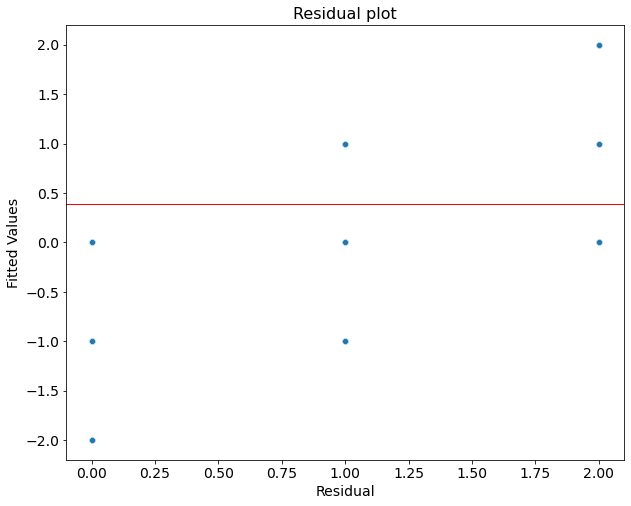

In [ ]:
# Plotting the residual plot

plt.figure(figsize = (10,8))
sns.scatterplot(x = y_pred, y = residuals)
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residual plot', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Residual', fontsize = 14)
plt.ylabel('Fitted Values', fontsize = 14)
plt.show()

From the plot we can see that the homoscedasticity assumption is not violated. The variances are uniform and not taking an increasing or decreasing trend.

Bartlett's test can be used to confirm these results

### Testing for Heteroskedasticity using Bartlett's Test

> Ho: Variances are homogenous

> Ha: Variances are heterogenous

In [ ]:
# Performing the test

import scipy as sc

stat, p_value = sc.stats.bartlett(y_pred, residuals)

# Obtaining the critical value

dof = len(y_pred) - 1
prob = 1 - p_value

critical_value = sc.stats.chi2.ppf(prob, dof)

print('Statistic:', stat)
print('Critical value', critical_value)

if stat > critical_value:
  print('Reject null hypothesis')
else:
  print('Do not reject null hypothesis')



Statistic: 605.3112370487237
Critical value inf
Do not reject null hypothesis


Since the chi square statistic is less than the critical value, we will fail to reject null and conclude that the error variances are homogenous.

Therefore there is no heteroskedasticity in our model

## 9. Challenging the solution

The solutions can be challenged in the following ways:

- In order to perform an accurate prediction on the home and away scores, the polynomial regression algorithm is not a good algorithm to use. It gave very low accuracy scores. Furthermore, the label is not continuous but discrete which gives even a greater reason to not use polynomial regression algorithm. This was a classification problem so maybe Logistic Regression or Random Forest would have yielded better results

- Instead of using a logistic model to predict whether the home team will lose, win or draw, algorithms such as Random Forest or SVM could be used to see if the accuracy of the model would improve.



### Building a Model using Random Forest

In [ ]:
# Fitting our model

from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier()

rfm.fit(X_train, y_train)

# Using our model to make a prediction

y_pred = rfm.predict(X_test)

# Accuracy of the model

accuracy_score(y_test, y_pred)


0.7848026120510537

Using the random Forest Method 78% model accuracy was attained. The results of a match would be predicted correctly at 78% accuracy using this model.

### Building a model using Support Vector Machine

In [ ]:
# Fitting our model

from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)

# Making predictions using our model

y_pred = svm.predict(X_test)

# Getting the accuracy score

accuracy_score(y_test, y_pred)

0.7022855446720095

Using the SVM algorithm, the accuracy was at 70.22%. The results of a match would be predicted correctly at 70.22% accuracy using this model.

The Random Forest model performed the best, followed by the SVM model and lastly the Logistic Regression model